In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [4]:
train_images = train_images.reshape((60000,28,28,1)).astype('float')
test_images = test_images.reshape((10000,28,28,1)).astype('float')
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=0.2, fill_mode='nearest')
validation_gen = ImageDataGenerator(rescale=1./255)
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32 ,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    train_gen.flow(train_images,train_labels,batch_size=1000), 
    steps_per_epoch = len(train_images)/1000, 
    epochs = 80, 
    validation_data= validation_gen.flow(test_images,test_labels,batch_size=100), 
    validation_steps= len(test_images)/100)

Epoch 1/80
60/60 [==============================] - 19s 320ms/step - loss: 1.9767 - accuracy: 0.2882 - val_loss: 0.9967 - val_accuracy: 0.7150
Epoch 2/80
60/60 [==============================] - 21s 356ms/step - loss: 1.4080 - accuracy: 0.5262 - val_loss: 0.7436 - val_accuracy: 0.7953
Epoch 3/80
60/60 [==============================] - 23s 390ms/step - loss: 1.1801 - accuracy: 0.6076 - val_loss: 0.5872 - val_accuracy: 0.8182
Epoch 4/80
60/60 [==============================] - 24s 395ms/step - loss: 1.0408 - accuracy: 0.6554 - val_loss: 0.4856 - val_accuracy: 0.8551
Epoch 5/80
60/60 [==============================] - 25s 413ms/step - loss: 0.9567 - accuracy: 0.6868 - val_loss: 0.4721 - val_accuracy: 0.8521
Epoch 6/80
60/60 [==============================] - 25s 411ms/step - loss: 0.8885 - accuracy: 0.7076 - val_loss: 0.4518 - val_accuracy: 0.8628
Epoch 7/80
60/60 [==============================] - 25s 416ms/step - loss: 0.8340 - accuracy: 0.7245 - val_loss: 0.4269 - val_accuracy: 0.8645

<Figure size 432x288 with 0 Axes>

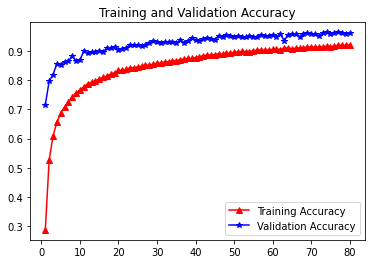

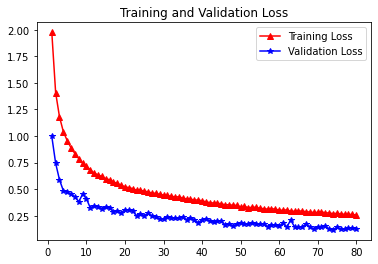

<Figure size 432x288 with 0 Axes>

In [5]:
loss,acc,val_loss,val_acc = history.history.values()
epochs = range(1,len(loss)+1)
import matplotlib.pyplot as plt
# Plot graph
plt.plot(epochs,acc,'r-^',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b-*', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'r-^',label='Training Loss')
plt.plot(epochs,val_loss,'b-*',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                51232     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               